In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df.head()

,visit_dt,user_id,customer_type,session_count,pageview_count,product_view_plp,product_view_pdp,total_product_view,addcart_count,order_count,order_revenue,search_count,avg_time_on_site
0,20221109,706224000000000,C,1.0,31.0,47.0,2.0,49.0,NaN,2.0,48.40,NaN,772
1,20221102,3941990000000000,I,10.0,46.0,24.0,NaN,NaN,2.0,4.0,207.48,2.0,312
2,20221108,3676330000000000,I,22.0,112.0,112.0,NaN,NaN,2.0,6.0,457.94,NaN,570
3,20221105,5679940000000000,I,1.0,25.0,7.0,2.0,9.0,1.0,1.0,135.60,NaN,2992
4,20221107,2947130000000000,I,3.0,17.0,NaN,2.0,NaN,2.0,1.0,232.30,NaN,162


In [ ]:
df.tail()

,visit_dt,user_id,customer_type,session_count,pageview_count,product_view_plp,product_view_pdp,total_product_view,addcart_count,order_count,order_revenue,search_count,avg_time_on_site
494251,20221107,6378160000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
494252,20221101,4409110000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
494253,20221107,2760050000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
494254,20221103,5191720000000000,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238
494255,20221108,5663180000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

visit_dt                   0
user_id                    0
customer_type         274591
session_count            171
pageview_count           171
product_view_plp      434123
product_view_pdp      440798
total_product_view    466369
addcart_count         468014
order_count           467363
order_revenue         467363
search_count          472722
avg_time_on_site           0
dtype: int64

In [ ]:
df = df.dropna(subset=['session_count'])

In [ ]:
#KPIs
df =  df.assign(conversion_rate=df['order_count']/df['session_count'])
df =  df.assign(average_order_value=df['order_revenue']/df['order_count'])
df =  df.assign(revenue_per_visit=df['order_revenue']/df['session_count'])
df =  df.assign(product_views_per_session=df['total_product_view']/df['session_count'])
df =  df.assign(search_rate=df['search_count']/df['session_count'])
df= df.assign(add_to_cart_rate=df['addcart_count']/df['product_view_plp'])


In [ ]:
df.head()

,visit_dt,user_id,customer_type,session_count,pageview_count,product_view_plp,product_view_pdp,total_product_view,addcart_count,order_count,order_revenue,search_count,avg_time_on_site,conversion_rate,average_order_value,revenue_per_visit,product_views_per_session,search_rate,add_to_cart_rate
0,20221109,706224000000000,C,1.0,31.0,47.0,2.0,49.0,NaN,2.0,48.40,NaN,772,2.000000,24.200000,48.400000,49.0,NaN,NaN
1,20221102,3941990000000000,I,10.0,46.0,24.0,NaN,NaN,2.0,4.0,207.48,2.0,312,0.400000,51.870000,20.748000,NaN,0.2,0.083333
2,20221108,3676330000000000,I,22.0,112.0,112.0,NaN,NaN,2.0,6.0,457.94,NaN,570,0.272727,76.323333,20.815455,NaN,NaN,0.017857
3,20221105,5679940000000000,I,1.0,25.0,7.0,2.0,9.0,1.0,1.0,135.60,NaN,2992,1.000000,135.600000,135.600000,9.0,NaN,0.142857
4,20221107,2947130000000000,I,3.0,17.0,NaN,2.0,NaN,2.0,1.0,232.30,NaN,162,0.333333,232.300000,77.433333,NaN,NaN,NaN


In [ ]:
df.describe()

,visit_dt,user_id,session_count,pageview_count,product_view_plp,product_view_pdp,total_product_view,addcart_count,order_count,order_revenue,search_count,avg_time_on_site,conversion_rate,average_order_value,revenue_per_visit,product_views_per_session,search_rate,add_to_cart_rate
count,4.918140e+05,4.918140e+05,491814.000000,491814.000000,57852.000000,51181.000000,25616.000000,23968.000000,24618.000000,24618.000000,19263.000000,491814.000000,24618.000000,24618.000000,24618.000000,25616.000000,19263.000000,9098.000000
mean,2.022111e+07,4.494323e+15,2.307689,6.926651,35.575503,2.498056,51.032167,2.500626,1.580713,196.925368,2.681825,169.867525,0.663722,126.042467,79.441855,24.667224,1.211478,0.116794
std,3.049329e+00,2.598803e+15,9.241924,26.338993,54.590023,4.381506,74.910931,3.708627,1.839081,395.775499,4.166624,514.192414,0.491561,168.253310,135.209362,30.529171,1.349120,0.177538
min,2.022110e+07,3.368896e+10,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.270000,1.000000,0.000000,0.009901,1.270000,0.027843,0.095238,0.009009,0.001976
25%,2.022110e+07,2.250300e+15,1.000000,1.000000,12.000000,1.000000,15.000000,1.000000,1.000000,43.775000,1.000000,0.000000,0.333333,38.110000,14.330000,7.000000,0.500000,0.032258
50%,2.022110e+07,4.490810e+15,1.000000,1.000000,24.000000,1.000000,32.000000,2.000000,1.000000,96.610000,2.000000,1.000000,0.500000,74.745000,38.443036,13.500000,1.000000,0.083333
75%,2.022111e+07,6.745990e+15,2.000000,6.000000,40.000000,3.000000,61.000000,3.000000,2.000000,225.327500,3.000000,108.000000,1.000000,142.050000,89.513000,30.000000,1.333333,0.125000
max,2.022111e+07,9.007070e+15,1180.000000,9676.000000,3695.000000,395.000000,3920.000000,136.000000,75.000000,25052.960000,295.000000,63602.000000,8.000000,2852.810000,4227.960000,485.000000,23.000000,3.583333


In [ ]:
df.nunique()

visit_dt                         10
user_id                      287344
customer_type                     4
session_count                   262
pageview_count                  428
product_view_plp                445
product_view_pdp                 69
total_product_view              448
addcart_count                    58
order_count                      32
order_revenue                 11399
search_count                     51
avg_time_on_site               4209
conversion_rate                 177
average_order_value           10960
revenue_per_visit             14001
product_views_per_session      1545
search_rate                     239
add_to_cart_rate                634
dtype: int64

In [ ]:
corelation= df.corr()

<ipython-input-14-6b1956047a46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation= df.corr()


In [ ]:
corelation

,visit_dt,user_id,session_count,pageview_count,product_view_plp,product_view_pdp,total_product_view,addcart_count,order_count,order_revenue,search_count,avg_time_on_site,conversion_rate,average_order_value,revenue_per_visit,product_views_per_session,search_rate,add_to_cart_rate
visit_dt,1.000000,-0.001988,-0.003419,-0.007320,0.013064,0.002381,0.010557,-0.027377,-0.023557,0.006086,-0.000293,-0.005115,0.004051,0.017482,0.017469,0.001637,-0.008426,-0.076218
user_id,-0.001988,1.000000,0.001345,0.000766,0.006081,0.010974,0.014052,-0.002442,0.005597,0.012242,0.003562,-0.000416,0.000154,0.011686,0.006186,-0.002303,0.005473,0.000368
session_count,-0.003419,0.001345,1.000000,0.683606,0.369477,0.442820,0.400013,0.357914,0.427428,0.305299,0.483440,0.190561,-0.233376,0.026772,-0.097259,-0.104525,-0.106386,-0.011018
pageview_count,-0.007320,0.000766,0.683606,1.000000,0.526434,0.544394,0.504499,0.482979,0.661526,0.402210,0.700802,0.517728,-0.166897,0.052633,-0.044901,0.000810,-0.043915,0.001490
product_view_plp,0.013064,0.006081,0.369477,0.526434,1.000000,0.656319,0.998369,0.312475,0.465668,0.337814,0.432798,0.380769,-0.071549,0.070401,0.018538,0.432304,-0.037272,-0.172527
product_view_pdp,0.002381,0.010974,0.442820,0.544394,0.656319,1.000000,0.698325,0.348961,0.231122,0.152440,0.588753,0.321306,-0.068512,0.000321,-0.023905,0.179500,0.038872,-0.027916
total_product_view,0.010557,0.014052,0.400013,0.504499,0.998369,0.698325,1.000000,0.320586,0.398770,0.294053,0.447604,0.356181,-0.065928,0.030266,-0.012510,0.423711,-0.040299,-0.159525
addcart_count,-0.027377,-0.002442,0.357914,0.482979,0.312475,0.348961,0.320586,1.000000,0.524447,0.351018,0.607283,0.385613,-0.048936,0.054680,0.011113,-0.059265,0.118532,0.402255
order_count,-0.023557,0.005597,0.427428,0.661526,0.465668,0.231122,0.398770,0.524447,1.000000,0.545180,0.415205,0.406555,0.115898,-0.007471,0.046974,-0.091734,-0.086708,0.025401
order_revenue,0.006086,0.012242,0.305299,0.402210,0.337814,0.152440,0.294053,0.351018,0.545180,1.000000,0.286846,0.269067,0.033676,0.586629,0.478002,-0.047116,0.000786,0.007774


<Axes: >

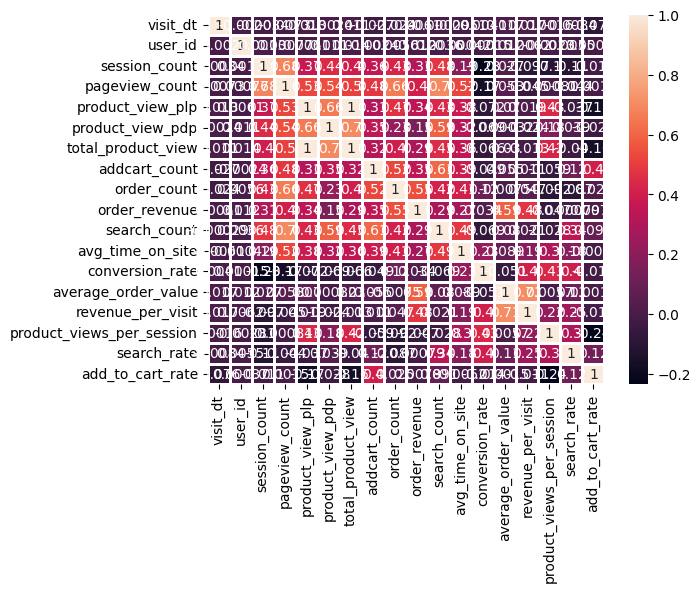

In [ ]:
sns.heatmap(corelation,linewidths=1,linecolor='white',xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [ ]:
df['visit_dt'] = df['visit_dt'].astype(str)
df['visit_dt'] = pd.to_datetime(df['visit_dt'], format='%Y%m%d')

In [ ]:
df.to_csv('transformed_data.csv')
files.download('transformed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>